## Introduction

Dean Karlan at Yale and John List at the University of Chicago conducted a field experiment to test the effectiveness of different fundraising letters. They sent out 50,000 fundraising letters to potential donors, randomly assigning each letter to one of three treatments: a standard letter, a matching grant letter, or a challenge grant letter. They published the results of this experiment in the _American Economic Review_ in 2007. The article and supporting data are available from the [AEA website](https://www.aeaweb.org/articles?id=10.1257/aer.97.5.1774) and from Innovations for Poverty Action as part of [Harvard's Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/27853&version=4.2).

The goal of their project was to test the effectiveness of a matching grant on chartiable giving. Via their large-scale natural field experiment, they found that match offer increases both the charitable revenue per solicitation and the response rate to the letters. However, the larger amount of the match ratio, (i.e. $3:$1 and $2:$1), relative to a smaller match ratio, ($1:$1), had no additional impact on the revenue per solicitation nor the response rate. 

This project seeks to replicate their results.

## Data


In [10]:
import numpy as np 
import pandas as pd 

karlan_df = pd.read_stata('data/karlan_list_2007.dta')

### Description

Below is the data from the Karlan et. al 2007 data. Of a sample of 50,083 individuals who have given to a charitable organization since 1991, they were randomized and assigned 67% into "match" treatment group and a 33% into control group. The "match" treatment group was offered a matching grant conditional on their donation. The database contains information about if the participant was placed in the treatment or control group, the ratio, the size of the donation and some more characteristics related to the charitable donation. 


In [12]:
karlan_df.describe()

,treatment,control,ratio2,ratio3,size25,size50,size100,sizeno,askd1,askd2,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
count,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,...,49978.000000,49978.000000,48217.000000,48047.000000,48217.000000,48221.000000,48209.000000,48214.000000,48215.000000,48217.000000
mean,0.666813,0.333187,0.222311,0.222211,0.166723,0.166623,0.166723,0.166743,0.222311,0.222291,...,0.510245,0.488715,0.819599,0.086710,0.321694,2.429012,54815.700533,0.669418,0.391661,0.871968
std,0.471357,0.471357,0.415803,0.415736,0.372732,0.372643,0.372732,0.372750,0.415803,0.415790,...,0.499900,0.499878,0.168561,0.135868,0.103039,0.378115,22027.316665,0.193405,0.186599,0.258654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009418,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.755845,0.014729,0.258311,2.210000,39181.000000,0.560222,0.235647,0.884929
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.872797,0.036554,0.305534,2.440000,50673.000000,0.712296,0.373744,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.938827,0.090882,0.369132,2.660000,66005.000000,0.816798,0.530036,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.989622,0.997544,5.270000,200001.000000,1.000000,1.000000,1.000000



### Variable Definitions

| Variable             | Description                                                         |
|----------------------|---------------------------------------------------------------------|
| `treatment`          | Treatment                                                           |
| `control`            | Control                                                             |
| `ratio`              | Match ratio                                                         |
| `ratio2`             | 2:1 match ratio                                                     |
| `ratio3`             | 3:1 match ratio                                                     |
| `size`               | Match threshold                                                     |
| `size25`             | \$25,000 match threshold                                            |
| `size50`             | \$50,000 match threshold                                            |
| `size100`            | \$100,000 match threshold                                           |
| `sizeno`             | Unstated match threshold                                            |
| `ask`                | Suggested donation amount                                           |
| `askd1`              | Suggested donation was highest previous contribution                |
| `askd2`              | Suggested donation was 1.25 x highest previous contribution         |
| `askd3`              | Suggested donation was 1.50 x highest previous contribution         |
| `ask1`               | Highest previous contribution (for suggestion)                      |
| `ask2`               | 1.25 x highest previous contribution (for suggestion)               |
| `ask3`               | 1.50 x highest previous contribution (for suggestion)               |
| `amount`             | Dollars given                                                       |
| `gave`               | Gave anything                                                       |
| `amountchange`       | Change in amount given                                              |
| `hpa`                | Highest previous contribution                                       |
| `ltmedmra`           | Small prior donor: last gift was less than median \$35              |
| `freq`               | Number of prior donations                                           |
| `years`              | Number of years since initial donation                              |
| `year5`              | At least 5 years since initial donation                             |
| `mrm2`               | Number of months since last donation                                |
| `dormant`            | Already donated in 2005                                             |
| `female`             | Female                                                              |
| `couple`             | Couple                                                              |
| `state50one`         | State tag: 1 for one observation of each of 50 states; 0 otherwise  |
| `nonlit`             | Nonlitigation                                                       |
| `cases`              | Court cases from state in 2004-5 in which organization was involved |
| `statecnt`           | Percent of sample from state                                        |
| `stateresponse`      | Proportion of sample from the state who gave                        |
| `stateresponset`     | Proportion of treated sample from the state who gave                |
| `stateresponsec`     | Proportion of control sample from the state who gave                |
| `stateresponsetminc` | stateresponset - stateresponsec                                     |
| `perbush`            | State vote share for Bush                                           |
| `close25`            | State vote share for Bush between 47.5% and 52.5%                   |
| `red0`               | Red state                                                           |
| `blue0`              | Blue state                                                          |
| `redcty`             | Red county                                                          |
| `bluecty`            | Blue county                                                         |
| `pwhite`             | Proportion white within zip code                                    |
| `pblack`             | Proportion black within zip code                                    |
| `page18_39`          | Proportion age 18-39 within zip code                                |
| `ave_hh_sz`          | Average household size within zip code                              |
| `median_hhincome`    | Median household income within zip code                             |
| `powner`             | Proportion house owner within zip code                              |
| `psch_atlstba`       | Proportion who finished college within zip code                     |
| `pop_propurban`      | Proportion of population urban within zip code                      |


### Balance Test 

As an ad hoc test of the randomization mechanism, I provide a series of tests that compare aspects of the treatment and control groups to assess whether they are statistically significantly different from one another.

I have created a function called `t_test_calc` that calculates the t_stat and indicates if there is statistically significant difference between the variables in the treatment and test groups at a pre-determined confidence interval. 

_todo: test a few variables other than the key outcome variables (for example, test months since last donation) to see if the treatment and control groups are statistically significantly different at the 95% confidence level. Do each as a t-test and separately as a linear regression, and confirm you get the exact same results from both methods. When doing a t-test, use the formula in the class slides. When doing the linear regression, regress for example mrm2 on treatment and look at the estimated coefficient on the treatment variable. It might be helpful to compare parts of your analysis to Table 1 in the paper. Be sure to comment on your results (hint: why is Table 1 included in the paper)._

In [13]:
def t_test_calc(data, treatment_col, control_col, outcome_col):
    treatment = data[data[treatment_col] == 1]
    control = data[data[control_col] == 1]
    mean_treatment = treatment[outcome_col].mean()
    mean_control = control[outcome_col].mean()
    diff_means = mean_treatment - mean_control
    std_treatment = treatment[outcome_col].std()
    std_control = control[outcome_col].std()
    n_treatment = len(treatment)
    n_control = len(control)
    t_stat = diff_means / np.sqrt((std_treatment**2/n_treatment) + (std_control**2/n_control))
    return t_stat

In [18]:
t_stat = t_test_calc(karlan_df, 'treatment', 'control', 'mrm2')

print(t_stat)

0.1161290976339475


In [15]:
karlan_df["mrm2"].fillna(0, inplace=True)

In [16]:
from sklearn.linear_model import LinearRegression

# Assuming data is a pandas DataFrame with columns 'outcome_variable', 'treatment', and 'other_variable'
X = karlan_df[['treatment']]  # Features
y = karlan_df['mrm2']  # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [0.01329623]
Intercept: 12.99814226643495


## Experimental Results

### Charitable Contribution Made

First, I analyze whether matched donations lead to an increased response rate of making a donation. 

_todo: make a barplot with two bars. Each bar is the proportion of people who donated. One bar for treatment and one bar for control._


In [26]:
import matplotlib as plt

from matplotlib import rcParams

AttributeError: module 'matplotlib' has no attribute 'xlabel'

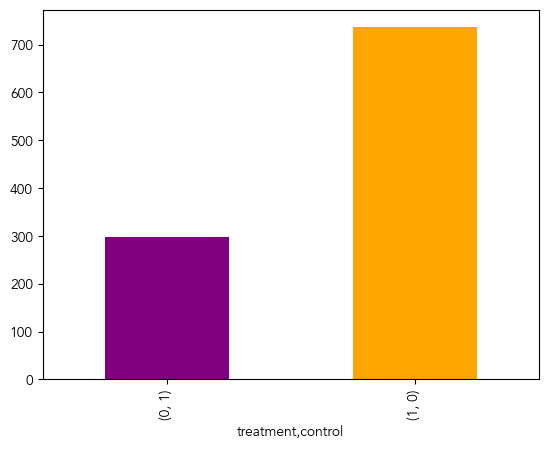

In [31]:

karlan_grouped = karlan_df.groupby(["treatment", "control"])["gave"].sum()
ax = karlan_grouped.plot(kind='bar', color = ["purple", "orange"])

rcParams['font.family'] = 'serif'  # Change 'serif' to the desired font family
rcParams['font.serif'] = ['Avenir'] 

plt.xlabel("Treatment vs. Control group")
#plt.ylabel('Number of people who Donated Money')
#plt.title('Number of people who gave in treatment vs. control group')

group_labels = ['Treatment', 'Control']
ax.set_xticklabels(group_labels, rotation = 0)

for i, v in enumerate(karlan_grouped):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

#plt.show()

![plot of treatment vs. control group](files/treatment_vs_control_plot.png)

_todo: run a t-test between the treatment and control groups on the binary outcome of whether any charitable donation was made. Also run a bivariate linear regression that demonstrates the same finding. (It may help to confirm your calculations match Table 2a Panel A.) Report your statistical results and interpret them in the context of the experiment (e.g., if you found a difference with a small p-value or that was statistically significant at some threshold, what have you learned about human behavior? Use mostly English words, not numbers or stats, to explain your finding.)_

_todo: run a probit regression where the outcome variable is whether any charitable donation was made and the explanatory variable is assignment to treatment or control. Confirm that your results replicate Table 3 column 1 in the paper._


### Differences between Match Rates

Next, I assess the effectiveness of different sizes of matched donations on the response rate.

_todo: Use a series of t-tests to test whether the size of the match ratio has an effect on whether people donate or not. For example, does the 2:1 match rate lead increase the likelihood that someone donates as compared to the 1:1 match rate? Do your results support the "figures suggest" comment the authors make on page 8?_

_todo: Assess the same issue using a regression. Specifically, create the variable `ratio1` then regress `gave` on `ratio1`, `ratio2`, and `ratio3` (or alternatively, regress `gave` on the categorical variable `ratio`). Interpret the coefficients and their statistical precision._

_todo: Calculate the response rate difference between the 1:1 and 2:1 match ratios and the 2:1 and 3:1 ratios.  Do this directly from the data, and do it by computing the differences in the fitted coefficients of the previous regression. what do you conclude regarding the effectiveness of different sizes of matched donations?_


### Size of Charitable Contribution

In this subsection, I analyze the effect of the size of matched donation on the size of the charitable contribution.

_todo: Calculate a t-test or run a bivariate linear regression of the donation amount on the treatment status. What do we learn from doing this analysis?_

_todo: now limit the data to just people who made a donation and repeat the previous analysis. This regression allows you to analyze how much respondents donate conditional on donating some positive amount. Interpret the regression coefficients -- what did we learn? Does the treatment coefficient have a causal interpretation?_ 

_todo: Make two plot: one for the treatment group and one for the control. Each plot should be a histogram of the donation amounts only among people who donated. Add a red vertical bar or some other annotation to indicate the sample average for each plot._


## Simulation Experiment

As a reminder of how the t-statistic "works," in this section I use simulation to demonstrate the Law of Large Numbers and the Central Limit Theorem.

Suppose the true distribution of respondents who do not get a charitable donation match is Bernoulli with probability p=0.018 that a donation is made. 

Further suppose that the true distribution of respondents who do get a charitable donation match of any size  is Bernoulli with probability p=0.022 that a donation is made.

### Law of Large Numbers

_to do:  Make a plot like those on slide 43 from our first class and explain the plot to the reader. To do this, you will simulate 100,00 draws from the control distribution and 10,000 draws from the treatment distribution. You'll then calculate a vector of 10,000 differences, and then you'll plot the cumulative average of that vector of differences. Comment on whether the cumulative average approaches the true difference in means._


### Central Limit Theorem

_to do: Make 4 histograms like those on slide 44 from our first class at sample sizes 50, 200, 500, and 1000 and explain these plots to the reader. To do this for a sample size of e.g. 50, take 50 draws from each of the control and treatment distributions, and calculate the average difference between those draws. Then repeat that process 999 more times so that you have 1000 averages. Plot the histogram of those averages. Comment on whether zero is in the "middle" of the distribution or whether it's in the "tail."_
